# Importing Libraries

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from datetime import datetime, timedelta

# Importing Data

In [179]:
with open('new_clean_data.pkl', 'rb') as file:
    df = pickle.load(file)

In [180]:
# adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [181]:
df.head()

,video_id,channel_id,title,description,tags,caption,licensed_content,view_count,like_count,comment_count,channel_name,subscribers,total_views,total_videos,playlist_id,category,duration_formatted,published_at_formatted,no_of_tags,title_length,description_length
0,3fqTNzXY5tg,UCvZnwzmc3m1Eush-Or8Z6DA,Using Code and GPT-3 to Learn Faster,Thanks to ProjectPro.io for their support: htt...,[],True,True,6871,184,23,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:18:06,2023-02-19 14:00:02,0,36,795
1,bgVu5WVR9SE,UCvZnwzmc3m1Eush-Or8Z6DA,Data Analyst MENTORSHIP - Q&A (while I drink ...,⬇️⬇️⬇️Check here prior to asking your question...,[],True,True,3723,184,9,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:29:22,2022-11-04 03:32:38,0,53,1475
2,4we3smhjAB8,UCvZnwzmc3m1Eush-Or8Z6DA,How Data Science ACTUALLY Works,Check out Deepnote for the easiest way to prac...,[],True,True,85152,2647,136,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:26:50,2022-11-01 16:30:09,0,31,1205
3,lpF5SSgczeE,UCvZnwzmc3m1Eush-Or8Z6DA,Does Instagram think you live in an influentia...,Request this and many other datasets @: https:...,[],True,True,4470,158,12,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 01:24:08,2022-10-25 14:00:07,0,81,1059
4,cRVM-LTe3fI,UCvZnwzmc3m1Eush-Or8Z6DA,Data Analyst MENTORSHIP - Q&A (while I drink ...,⬇️⬇️⬇️Check here prior to asking your question...,[],True,True,3078,104,4,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:26:55,2022-10-07 03:36:26,0,53,1475


# EDA

## Cleaning

In [182]:
# create time delta to check videos posted in last 30days
now = datetime.now()

one_month_ago = now - timedelta(days=30)

one_month_ago

datetime.datetime(2023, 11, 29, 16, 40, 54, 446566)

In [183]:
# create df of videos a month old
df_one_month_ago = df[df['published_at_formatted'] >= one_month_ago]

In [184]:
# create df of videos only a minute long
min_vid_time = timedelta(seconds=60)

df_oneminvid = df[df['duration_formatted'] <= min_vid_time]

In [185]:
df.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,9322.00,9322.00,9322.00,9322.00,9322.00,9322.00,9322,9322.00,9322.00,9322.00
mean,41207.70,950.78,54.35,448648.02,37438378.55,1079.89,0 days 00:31:00.894121433,12.26,62.53,2109.46
std,161115.87,3091.49,162.94,346890.26,31298157.33,721.74,0 days 00:57:43.756530145,8.71,21.65,1204.35
min,0.00,0.00,0.00,20900.00,291211.00,58.00,0 days 00:00:00,0.00,4.00,0.00
25%,1811.50,38.00,2.00,155000.00,8740951.00,303.00,0 days 00:04:11,5.00,46.00,1114.25
50%,6974.50,177.50,12.00,255000.00,22950468.00,1532.00,0 days 00:10:59,11.00,60.00,2093.00
75%,24418.25,638.00,47.00,809000.00,63094287.00,1758.00,0 days 00:40:55.500000,20.00,81.00,2921.00
max,7615207.00,65474.00,4269.00,1060000.00,86329667.00,1857.00,0 days 11:59:53,44.00,109.00,5000.00


In [186]:
df_one_month_ago.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,108.00,108.00,108.00,108.00,108.00,108.00,108,108.00,108.00,108.00
mean,10015.98,397.05,17.64,258494.44,21929599.19,813.04,0 days 00:17:57.314814814,7.39,64.66,1122.54
std,17652.62,662.79,26.76,299216.54,27569948.78,631.76,0 days 00:32:57.065169642,7.77,20.94,1084.87
min,0.00,0.00,0.00,29300.00,1588707.00,58.00,0 days 00:00:00,0.00,20.00,0.00
25%,342.75,11.00,0.75,61900.00,4258081.00,302.50,0 days 00:00:56,0.00,48.75,91.00
50%,3575.50,177.00,6.00,106000.00,5737808.00,576.00,0 days 00:05:50,6.00,65.00,896.00
75%,11559.00,506.50,25.25,211000.00,22950468.00,1532.00,0 days 00:21:04,8.00,81.00,1950.25
max,125592.00,5051.00,131.00,1060000.00,86329667.00,1857.00,0 days 04:34:24,32.00,100.00,4434.00


In [187]:
df_oneminvid.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,818.00,818.00,818.00,818.00,818.00,818.00,818,818.00,818.00,818.00
mean,44427.59,777.40,17.46,246577.02,17595233.87,572.31,0 days 00:00:39.367970660,10.76,50.05,1253.12
std,314251.60,1839.45,28.06,259381.01,21575692.28,521.90,0 days 00:00:16.154935311,9.59,18.86,1027.15
min,0.00,0.00,0.00,20900.00,291211.00,58.00,0 days 00:00:00,0.00,8.00,0.00
25%,2623.75,82.00,3.00,61900.00,4258081.00,286.00,0 days 00:00:28,0.00,37.00,231.00
50%,7963.00,293.50,8.50,185000.00,9376789.00,308.00,0 days 00:00:42,8.00,47.00,1420.00
75%,16805.00,718.75,20.00,220000.00,14481229.00,576.00,0 days 00:00:54,20.00,59.00,1948.00
max,7615207.00,23776.00,251.00,1060000.00,86329667.00,1857.00,0 days 00:01:00,33.00,100.00,3764.00


In [188]:
# drop videos upto a minute in duration, as youtube shorts are 60seconds, these videos have a large std, and include advertisement videos

df.drop(df[df['duration_formatted'] <= min_vid_time].index, inplace=True)

In [189]:
df.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,8504.00,8504.00,8504.00,8504.00,8504.00,8504.00,8504,8504.0,8504.00,8504.00
mean,40897.98,967.45,57.90,468085.23,39347091.20,1128.72,0 days 00:33:56.106773283,12.4,63.73,2191.83
std,137716.37,3185.67,169.95,348049.79,31425469.48,719.50,0 days 00:59:37.970832538,8.6,21.52,1187.98
min,4.00,0.00,0.00,20900.00,291211.00,58.00,0 days 00:01:01,0.0,4.00,0.00
25%,1748.25,35.00,2.00,155000.00,8740951.00,303.00,0 days 00:05:15,5.0,47.00,1226.75
50%,6837.50,167.00,12.00,256000.00,22950468.00,1532.00,0 days 00:12:55,11.0,62.00,2161.00
75%,25663.75,626.00,52.00,809000.00,63094287.00,1758.00,0 days 00:47:25.750000,20.0,82.25,2993.25
max,3291420.00,65474.00,4269.00,1060000.00,86329667.00,1857.00,0 days 11:59:53,44.0,109.00,5000.00


In [190]:
# check how many videos are recently uploaded and how they are distributed
one_week_ago = now - timedelta(weeks=2, days=1)

one_week_ago

df_one_week_ago = df[df['published_at_formatted'] >= one_week_ago]

df_one_week_ago.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,11.00,11.00,11.00,11.00,11.00,11.00,11,11.00,11.00,11.00
mean,4269.09,219.00,12.82,439627.27,36920195.36,1092.64,0 days 00:22:34,10.82,64.27,2191.09
std,6545.47,377.57,23.24,345080.87,31674502.24,732.10,0 days 00:20:09.563474977,10.44,25.37,958.54
min,95.00,4.00,0.00,61900.00,4258081.00,116.00,0 days 00:03:57,0.00,32.00,1069.00
25%,161.00,6.00,0.00,155000.00,11929009.00,381.50,0 days 00:05:47.500000,5.00,46.50,1594.00
50%,382.00,11.00,1.00,211000.00,22950468.00,1532.00,0 days 00:15:11,8.00,52.00,1974.00
75%,6293.00,222.50,14.50,809000.00,63094287.00,1758.00,0 days 00:35:16.500000,15.50,93.50,2481.00
max,16748.00,1099.00,75.00,851000.00,86329667.00,1857.00,0 days 00:57:38,29.00,99.00,4434.00


In [191]:
# drop recently uploaded videos as not enough time to collect view data
df.drop(df[df['published_at_formatted'] >= one_week_ago].index, inplace=True)

In [192]:
# create target column for successful video or not
df['target'] = df['view_count'].apply(lambda x: 1 if x >= 6856 else 0)

In [193]:
df['target'].value_counts(normalize=True)*100

0    50.017662
1    49.982338
Name: target, dtype: float64

In [194]:
# create age of video column
df['age'] = (datetime.now() - df['published_at_formatted']).dt.days

In [195]:
# convert timedelta values to respective minutes 
df['duration_minutes'] = df['duration_formatted'].apply(lambda x: round(x.total_seconds() / 60))

In [196]:
df.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length,target,age,duration_minutes
count,8493.00,8493.00,8493.00,8493.00,8493.00,8493.00,8493,8493.0,8493.00,8493.00,8493.0,8493.00,8493.00
mean,40945.42,968.42,57.96,468122.09,39350234.47,1128.76,0 days 00:33:56.990227245,12.4,63.73,2191.83,0.5,1107.85,33.95
std,137799.04,3187.59,170.05,348072.25,31426903.78,719.53,0 days 00:59:39.962528785,8.6,21.52,1188.29,0.5,629.70,59.67
min,4.00,0.00,0.00,20900.00,291211.00,58.00,0 days 00:01:01,0.0,4.00,0.00,0.0,15.00,1.00
25%,1751.00,35.00,2.00,155000.00,8740951.00,303.00,0 days 00:05:15,5.0,47.00,1225.00,0.0,655.00,5.00
50%,6846.00,167.00,12.00,256000.00,22950468.00,1532.00,0 days 00:12:55,11.0,62.00,2162.00,0.0,1079.00,13.00
75%,25693.00,626.00,52.00,809000.00,63094287.00,1758.00,0 days 00:47:31,20.0,82.00,2994.00,1.0,1385.00,48.00
max,3291420.00,65474.00,4269.00,1060000.00,86329667.00,1857.00,0 days 11:59:53,44.0,109.00,5000.00,1.0,3822.00,720.00


## Univariate Analysis

#### Continuous Columns Scaled

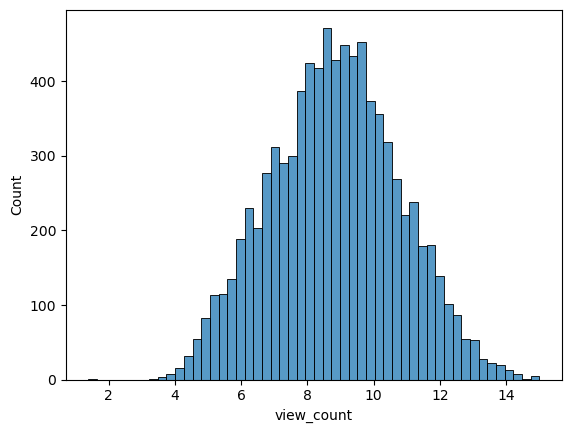

c:\Users\mms\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


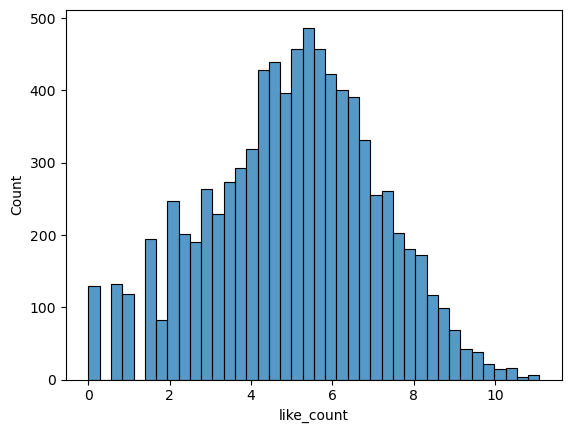

c:\Users\mms\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


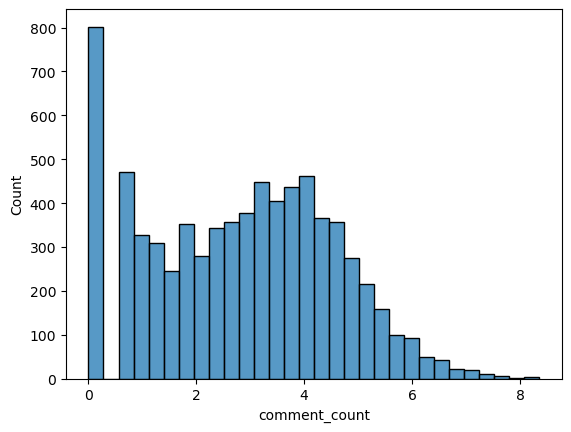

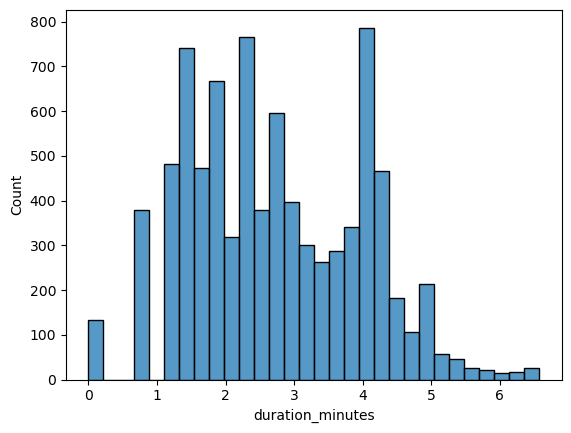

In [197]:
# scale the data by getting the logarithim values for better visualisation
column_list = ['view_count', 'like_count', 'comment_count', 'duration_minutes']
for column in column_list:
    log_data = np.log(df[column])
    sns.histplot(data=log_data)
    plt.show()

In [198]:
# find the exponential values of the logarithmic values
for i in range(2,15,2):
    print(np.exp(i))

    exp_list = [7, 50, 400, 3000, 22000, 160000, 12000000]

7.38905609893065
54.598150033144236
403.4287934927351
2980.9579870417283
22026.465794806718
162754.79141900392
1202604.2841647768


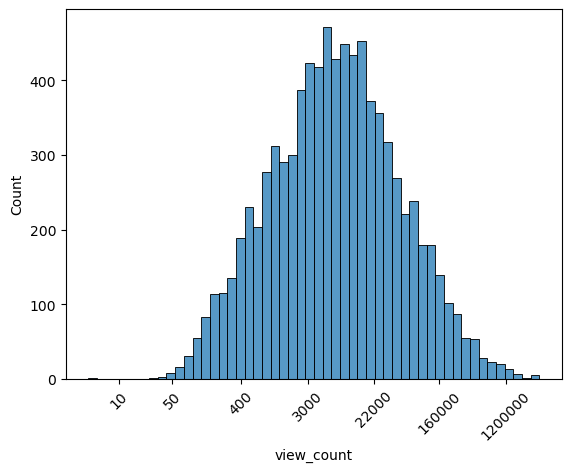

In [199]:
# convert view count back to the exponentiation values (original scale)

log_data = np.log(df['view_count'])
sns.histplot(data=log_data)
# customise the x-axis ticks
custom_ticks = [10, 50, 400, 3000, 22000, 160000, 1200000]  # convert log scale to original scale
plt.xticks(np.log(custom_ticks), custom_ticks, rotation=45)

plt.show()

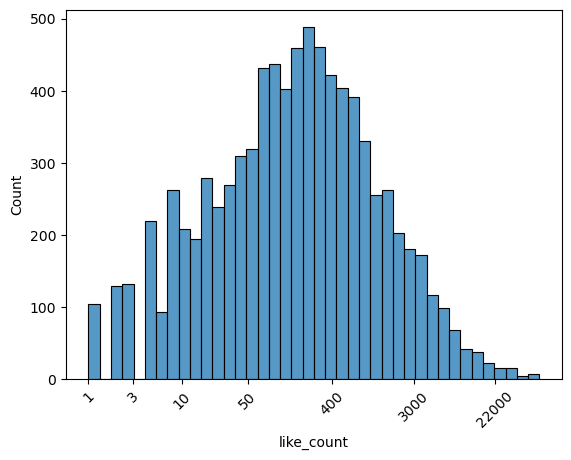

In [200]:
# convert like count back to the exponentiation values (original scale)

log_data = np.log(df['like_count'] + 1) ## added 1 to offset 0 division
sns.histplot(data=log_data)
# customise the x-axis ticks
custom_ticks = [1, 3, 10, 50, 400, 3000, 22000]
exp_ticks = np.exp(plt.xticks()[0])
# convert log scale to original scale
plt.xticks(np.log(custom_ticks), custom_ticks, rotation=45)

plt.show()

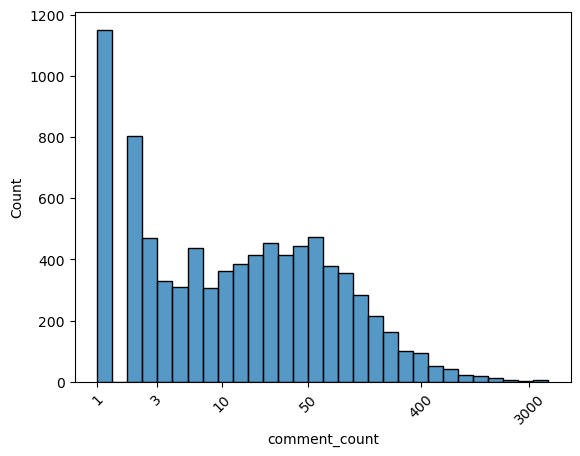

In [201]:
# convert comment count back to the exponentiation values (original scale)

log_data = np.log(df['comment_count'] + 1) ## added one to offset 0 division 
sns.histplot(data=log_data)
# customise the x-axis ticks
custom_ticks = [1, 3, 10, 50, 400, 3000]
exp_ticks = np.exp(plt.xticks()[0])
# convert log scale to original scale
plt.xticks(np.log(custom_ticks), custom_ticks, rotation=45)

plt.show()

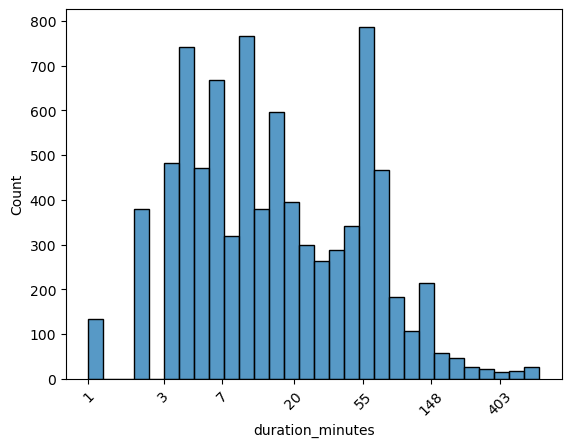

In [202]:
# convert duration_minutes back to the exponentiation values (original scale)

log_data = np.log(df.duration_minutes)
sns.histplot(log_data)

original_ticks = np.exp(plt.xticks()[0])
custom_ticks = [1, 3, 7, 20, 55, 148, 403]
plt.xticks(np.log(custom_ticks), custom_ticks, rotation=45)

plt.show()

#### Continuous Columns Continued

In [203]:
df.describe().columns

Index(['view_count', 'like_count', 'comment_count', 'subscribers',
       'total_views', 'total_videos', 'duration_formatted', 'no_of_tags',
       'title_length', 'description_length', 'target', 'age',
       'duration_minutes'],
      dtype='object')

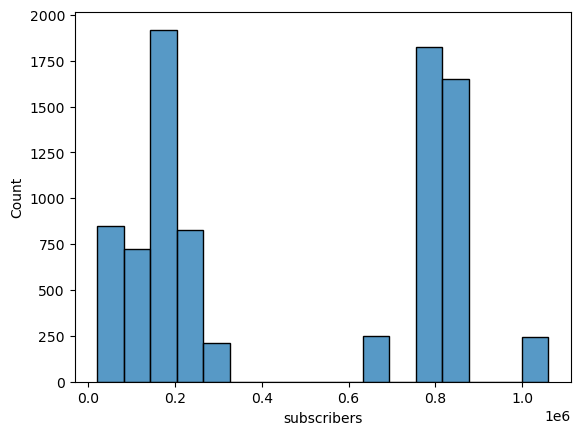

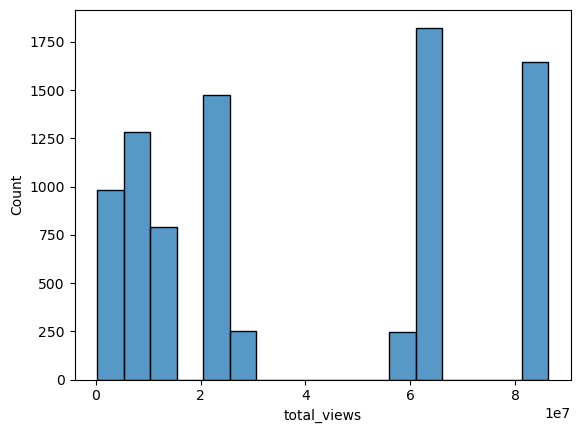

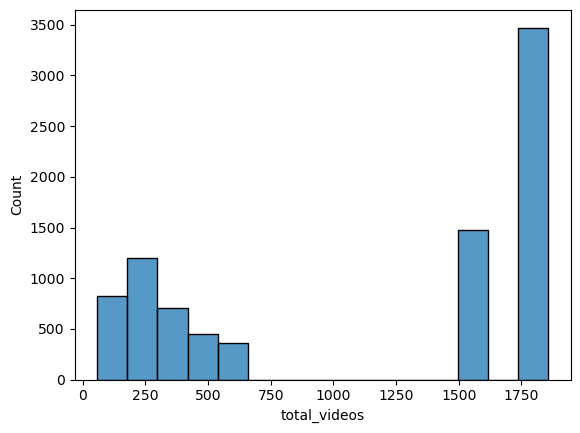

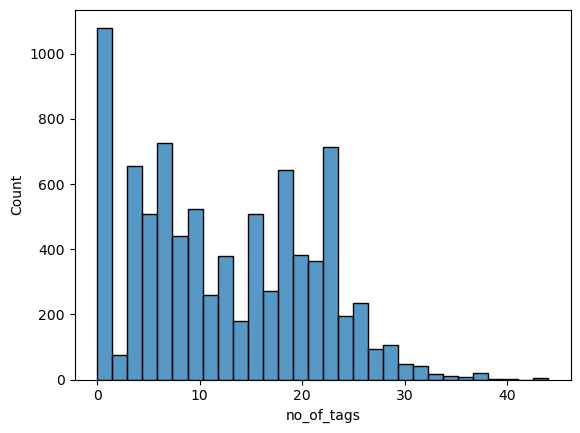

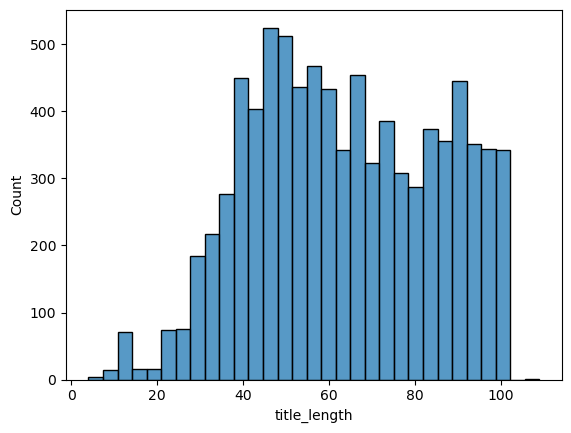

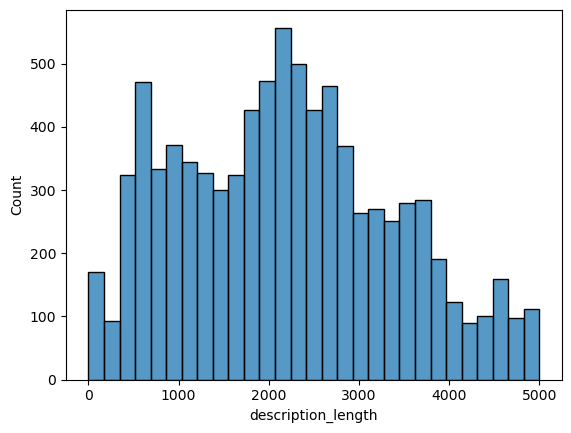

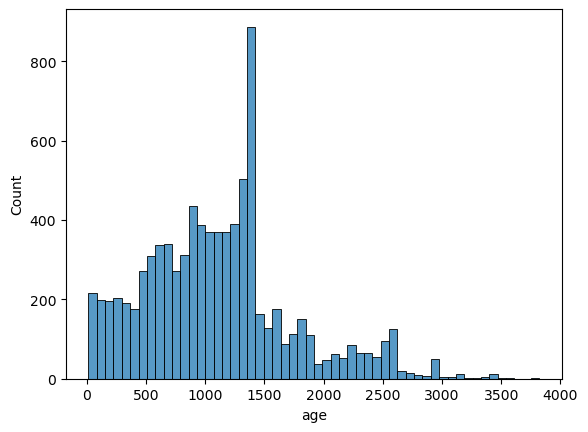

In [204]:
# continuous columns, scaling not required
columns_list = ['subscribers', 'total_views', 'total_videos', 'no_of_tags', 'title_length', 'description_length', 'age']
for column in columns_list:
    sns.histplot(data=df[column])
    plt.show()

In [205]:
## add days to age

#### Categorical Columns

In [206]:
df.columns

Index(['video_id', 'channel_id', 'title', 'description', 'tags', 'caption',
       'licensed_content', 'view_count', 'like_count', 'comment_count',
       'channel_name', 'subscribers', 'total_views', 'total_videos',
       'playlist_id', 'category', 'duration_formatted',
       'published_at_formatted', 'no_of_tags', 'title_length',
       'description_length', 'target', 'age', 'duration_minutes'],
      dtype='object')

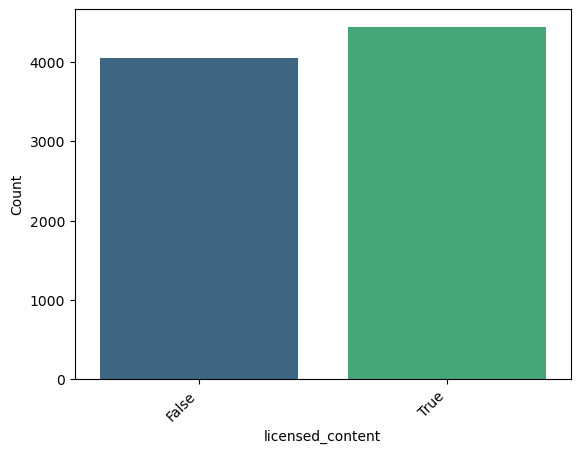

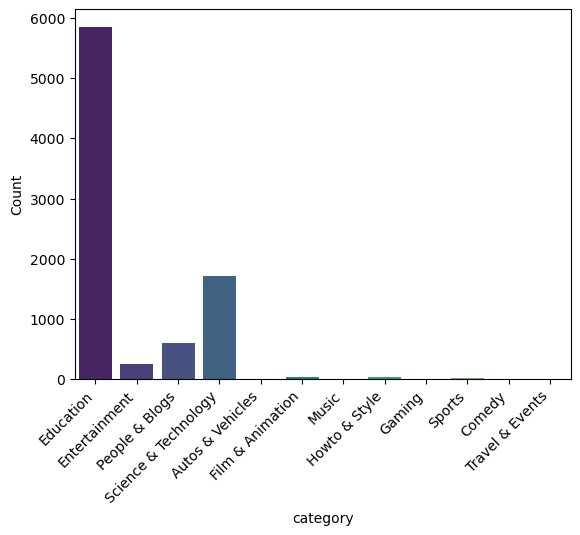

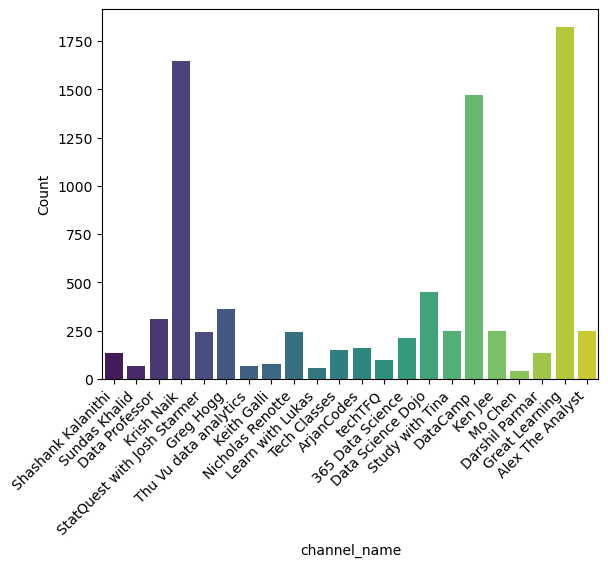

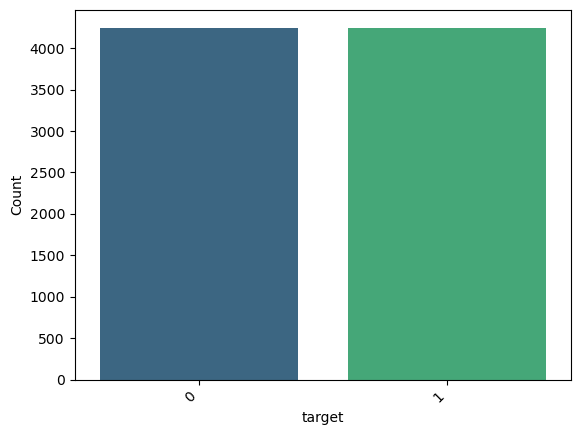

In [207]:
# list categorical columns
cat_columns = ['licensed_content', 'category', 'channel_name', 'target']

# create countplots for all categorical columns
for column in cat_columns:

    sns.countplot(data=df, x=column, palette='viridis')

    plt.xlabel(column)
    plt.ylabel('Count')

    plt.xticks(ha='right', rotation=45)

    plt.show()

#### Tag column

In [208]:
# store unique tag count across df
unique_tag_count = {}

# iterate through unique tags and map their count
for tag_list in df['tags']:

    for tag in tag_list:
        if tag.lower() in unique_tag_count:
            unique_tag_count[tag.lower()] += 1
        else:
            unique_tag_count[tag.lower()] = 1

# sort unique tag count in descending order
unique_tag_count = dict(sorted(unique_tag_count.items(), key=lambda item: item[1], reverse=True))

# find out how many unique tags we have
print(len(unique_tag_count))

# create data frame of tags data
df_tags = pd.DataFrame((list(unique_tag_count.items())[:10])).rename(columns={0: 'tags', 1: 'count'})

31967


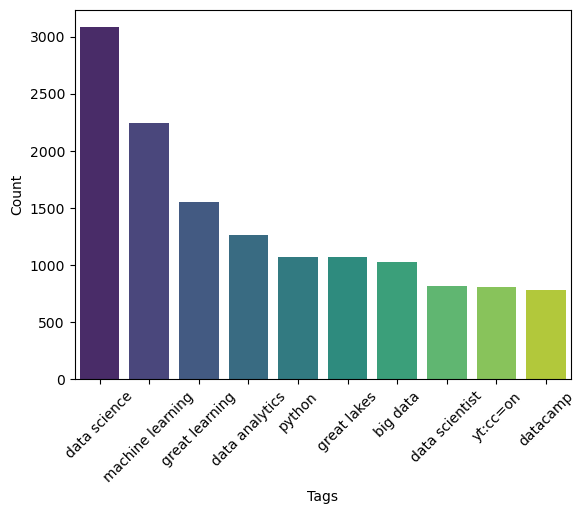

In [209]:
# top 10 tag distribution
sns.barplot(data=df_tags, x='tags', y='count', palette='viridis')

plt.xlabel('Tags')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

## Bivariate Analysis

#### Continuous Columns vs View Count

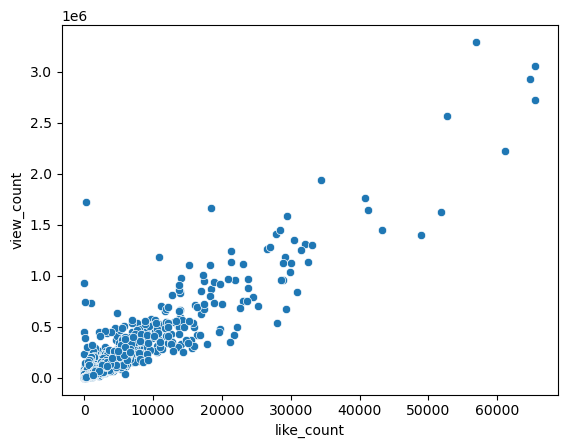

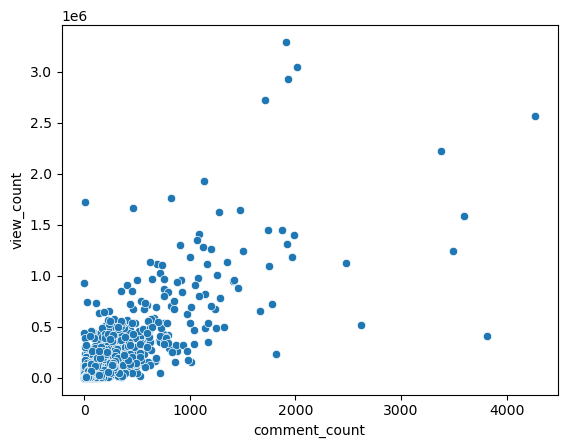

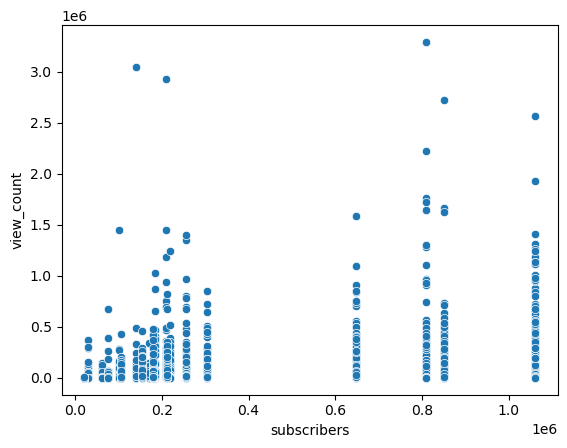

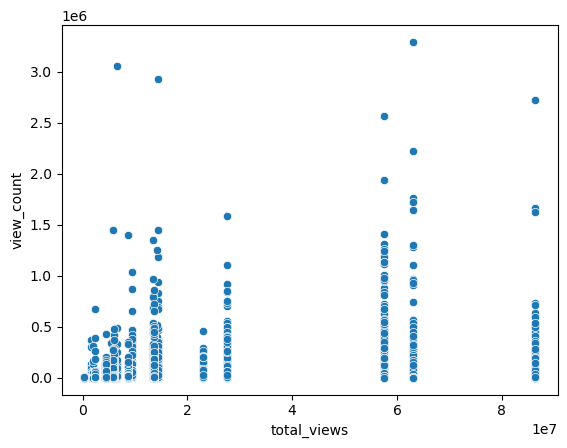

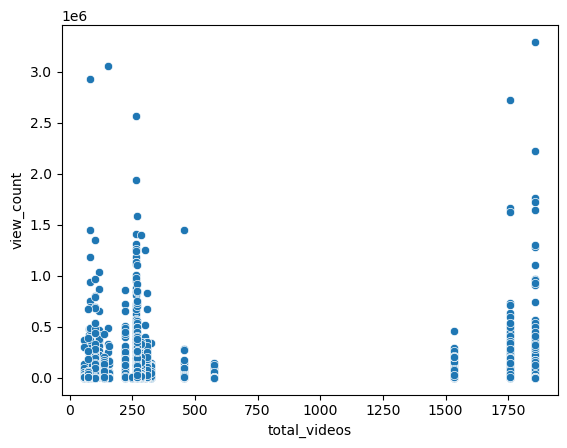

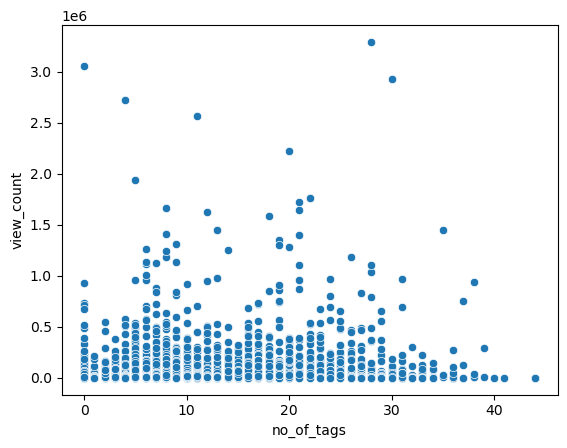

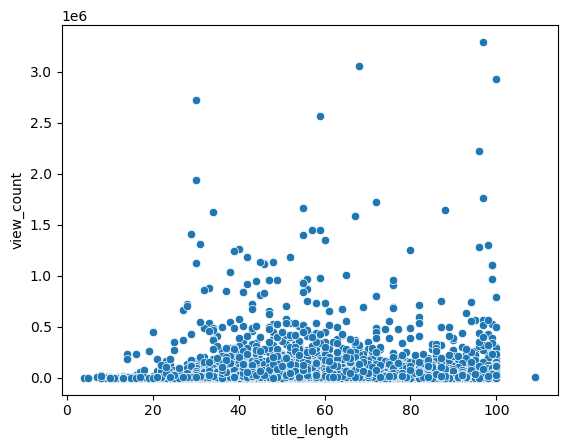

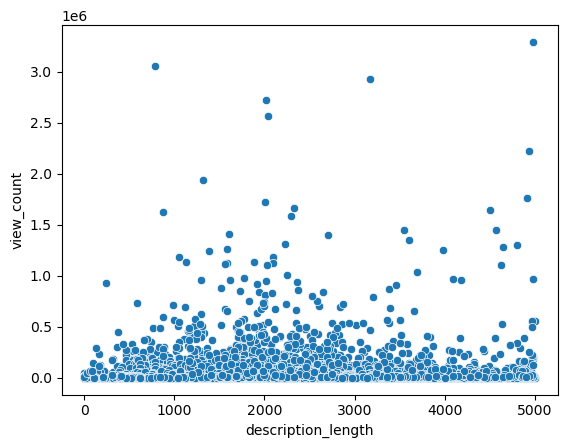

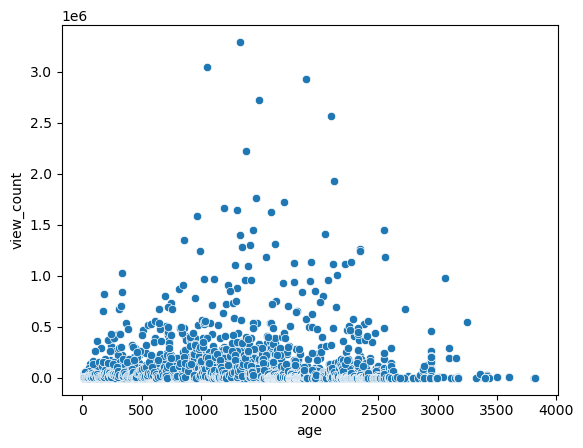

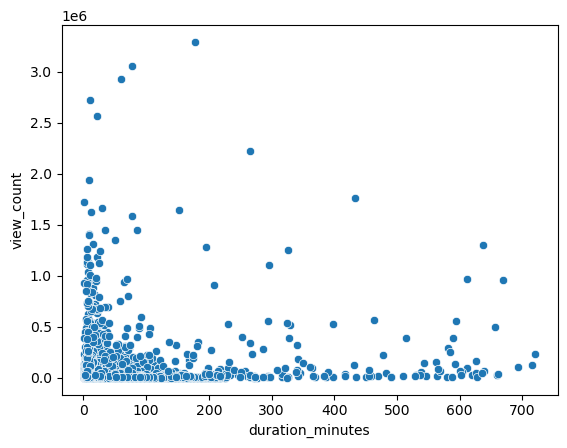

In [210]:
target = 'view_count' 

con_columns = ['like_count', 'comment_count', 'subscribers', 'total_views', 'total_videos', 'no_of_tags', 'title_length', 'description_length', 'age', 'duration_minutes']


for column in con_columns:

    sns.scatterplot(data=df, x=column, y=target)

    plt.xlabel(column)
    plt.ylabel(target)

    plt.show()


#### Catergorical Columns vs View Count

C:\Users\mms\AppData\Local\Temp\ipykernel_8976\3238579171.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['log_target'] = np.log(df['view_count'])


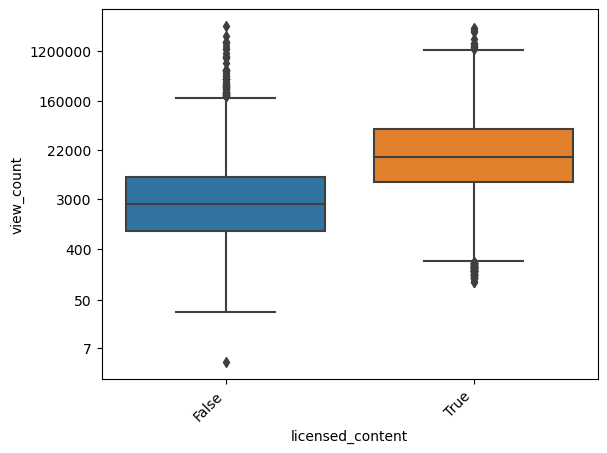

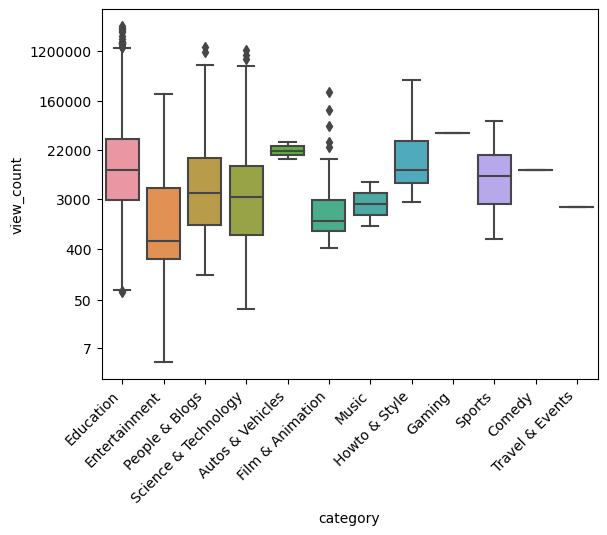

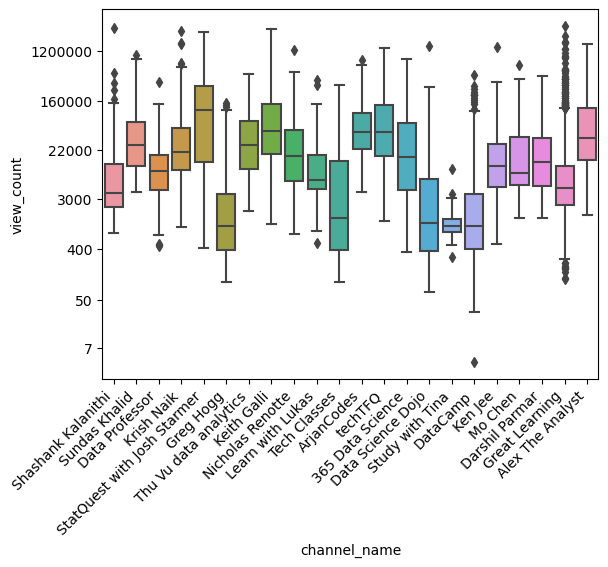

In [211]:
# list categorical columns
cat_columns = ['licensed_content', 'category', 'channel_name']

cat_df = df[['licensed_content', 'category', 'channel_name']]

cat_df['log_target'] = np.log(df['view_count'])

exp_list = [7, 50, 400, 3000, 22000, 160000, 1200000]

for column in cat_columns:

    sns.boxplot(data=cat_df, x=column, y='log_target')

    plt.xlabel(column)
    plt.ylabel('view_count')
    
    plt.xticks(rotation=45, ha='right')
    plt.yticks(np.log(exp_list), exp_list)


    plt.show()

In [212]:
df.category.value_counts()

Education               5852
Science & Technology    1713
People & Blogs           595
Entertainment            256
Film & Animation          28
Howto & Style             27
Sports                    15
Autos & Vehicles           2
Music                      2
Gaming                     1
Comedy                     1
Travel & Events            1
Name: category, dtype: int64

#### Tag Column vs View Count

In [213]:
# new df with required columns

tag_df = df[['video_id', 'view_count', 'tags', 'target']]

tag_df.tail()

,video_id,view_count,tags,target
9317,4rfr6A3lO-Y,66316,"[Data Analyst, How to become a data analyst, D...",1
9318,OTq2NRy_AGs,14527,"[Data Analyst, How to become a Data Analyst, B...",1
9319,ya28cb3zFGE,62166,"[Data Analyst Salary, Data analyst with no exp...",1
9320,Hsi2BG0SOiQ,8157,"[Working at a big company, Big company data an...",1
9321,6lQzbk6_OTw,27814,"[Top skills for data analyst, Top 3 skills for...",1


In [214]:
list(unique_tag_count.items())[:10]

[('data science', 3080),
 ('machine learning', 2247),
 ('great learning', 1554),
 ('data analytics', 1265),
 ('python', 1073),
 ('great lakes', 1067),
 ('big data', 1028),
 ('data scientist', 819),
 ('yt:cc=on', 807),
 ('datacamp', 780)]

In [215]:
# create top 10 tag column mapping
tag_list = ['data science', 'machine learning', 'great learning', 'data analytics', 'python', 'great lakes', 'big data', 'data scientist', 'yt:cc=on', 'datacamp']

for column in tag_list:

    tag_df[column.replace(' ', '_') + '_tag'] = tag_df['tags'].apply(lambda x: 1 if column in [tag.lower().strip() for tag in x] else 0)

C:\Users\mms\AppData\Local\Temp\ipykernel_8976\3020744870.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tag_df[column.replace(' ', '_') + '_tag'] = tag_df['tags'].apply(lambda x: 1 if column in [tag.lower().strip() for tag in x] else 0)
C:\Users\mms\AppData\Local\Temp\ipykernel_8976\3020744870.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tag_df[column.replace(' ', '_') + '_tag'] = tag_df['tags'].apply(lambda x: 1 if column in [tag.lower().strip() for tag in x] else 0)
C:\Users\mms\AppData\Local

In [216]:
tag_df.tail()

,video_id,view_count,tags,target,data_science_tag,machine_learning_tag,great_learning_tag,data_analytics_tag,python_tag,great_lakes_tag,big_data_tag,data_scientist_tag,yt:cc=on_tag,datacamp_tag
9317,4rfr6A3lO-Y,66316,"[Data Analyst, How to become a data analyst, D...",1,0,0,0,1,0,0,0,0,0,0
9318,OTq2NRy_AGs,14527,"[Data Analyst, How to become a Data Analyst, B...",1,1,0,0,0,0,0,0,1,0,0
9319,ya28cb3zFGE,62166,"[Data Analyst Salary, Data analyst with no exp...",1,1,0,0,0,0,0,0,1,0,0
9320,Hsi2BG0SOiQ,8157,"[Working at a big company, Big company data an...",1,0,0,0,0,0,0,0,0,0,0
9321,6lQzbk6_OTw,27814,"[Top skills for data analyst, Top 3 skills for...",1,0,0,0,0,0,0,0,0,0,0


In [217]:
tag_df.columns

Index(['video_id', 'view_count', 'tags', 'target', 'data_science_tag',
       'machine_learning_tag', 'great_learning_tag', 'data_analytics_tag',
       'python_tag', 'great_lakes_tag', 'big_data_tag', 'data_scientist_tag',
       'yt:cc=on_tag', 'datacamp_tag'],
      dtype='object')

In [218]:
exp_list

[7, 50, 400, 3000, 22000, 160000, 1200000]

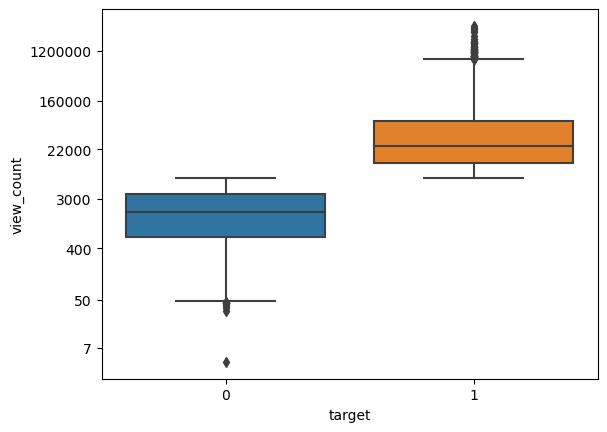

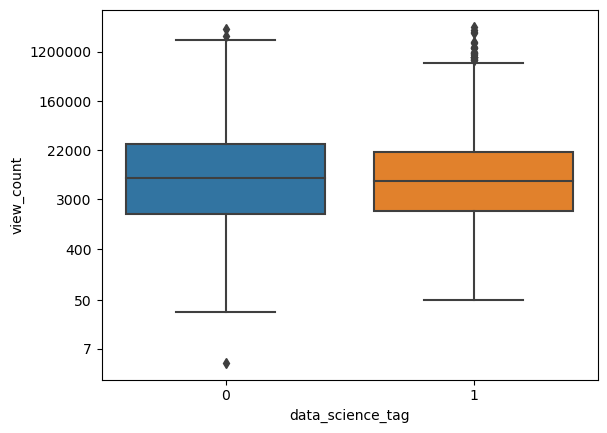

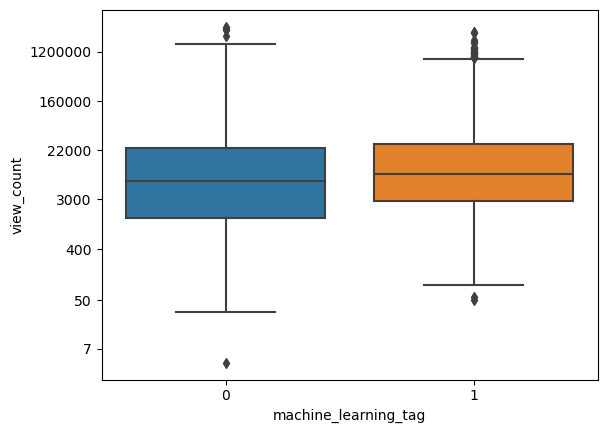

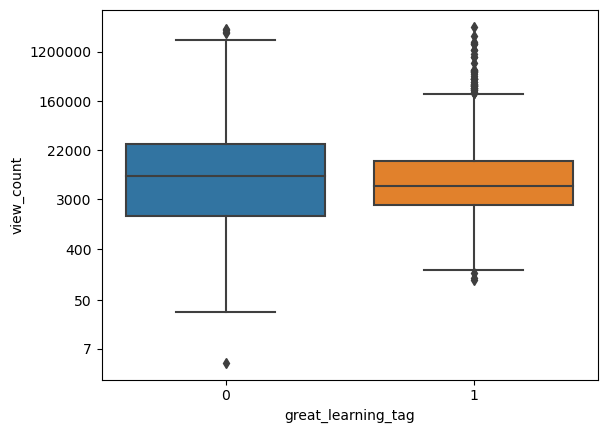

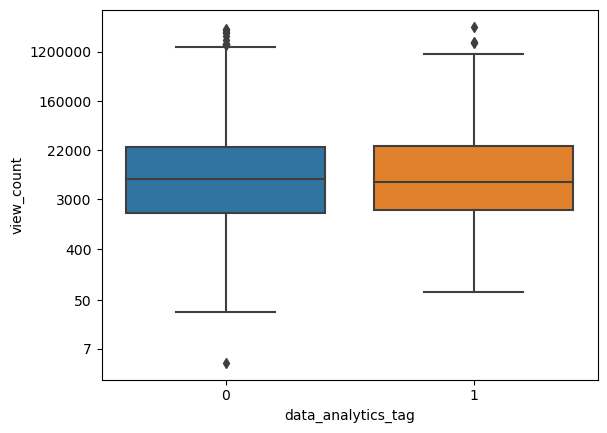

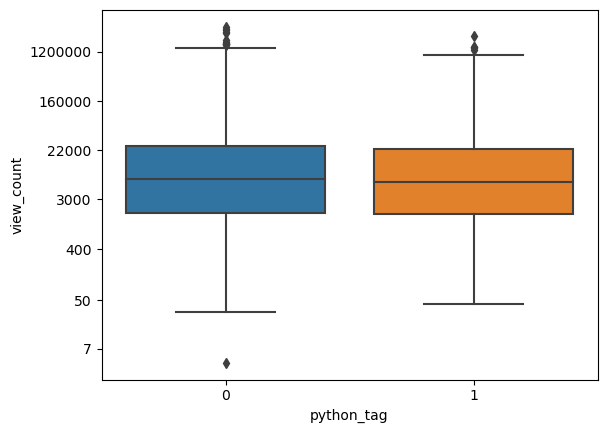

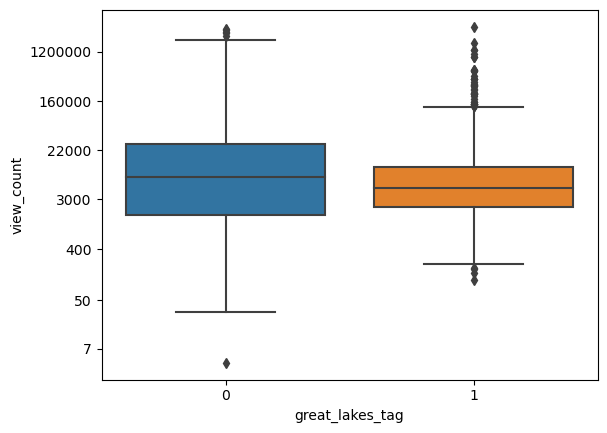

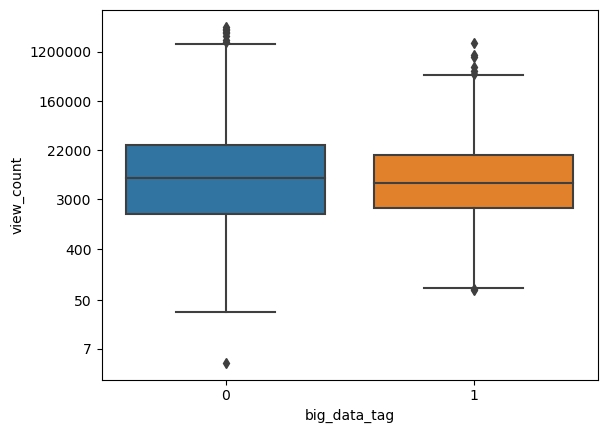

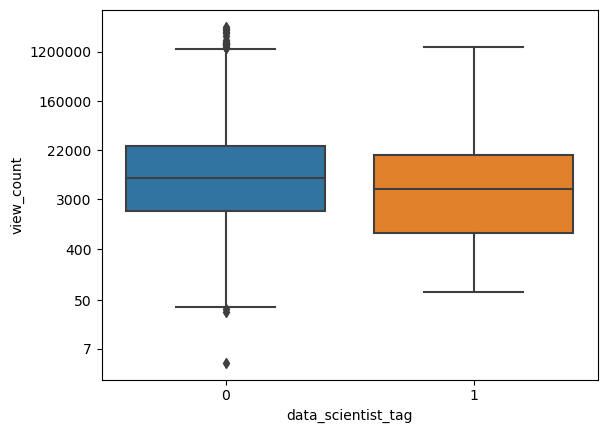

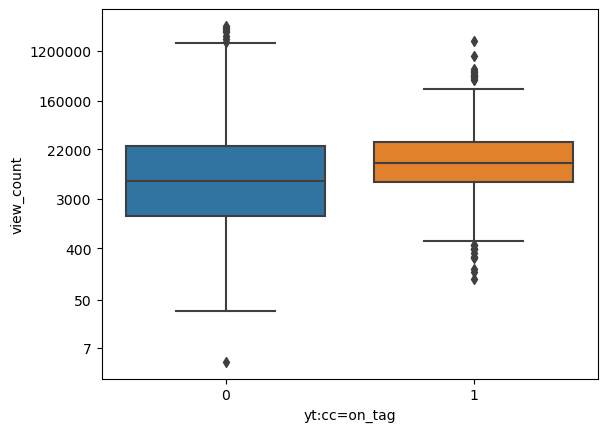

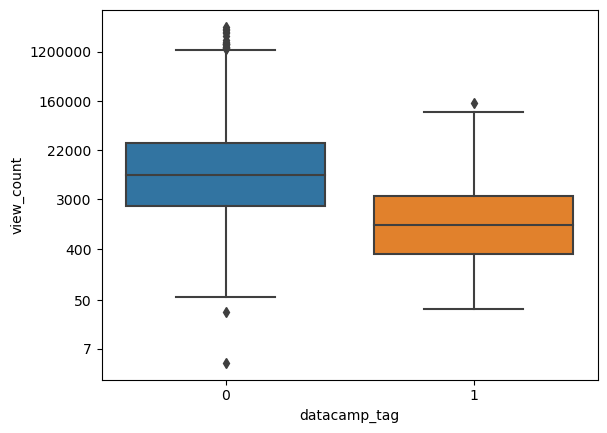

In [219]:
# create box plots to visualise views vs tags
for column in tag_df.columns[3:]:
    log_view_count = np.log(tag_df['view_count'])

    sns.boxplot(data=tag_df, x=column, y=log_view_count)

    plt.xlabel(column)
    plt.ylabel('view_count')

    plt.yticks(np.log(exp_list), exp_list)

    plt.show()

#### Target

##### Continuous 

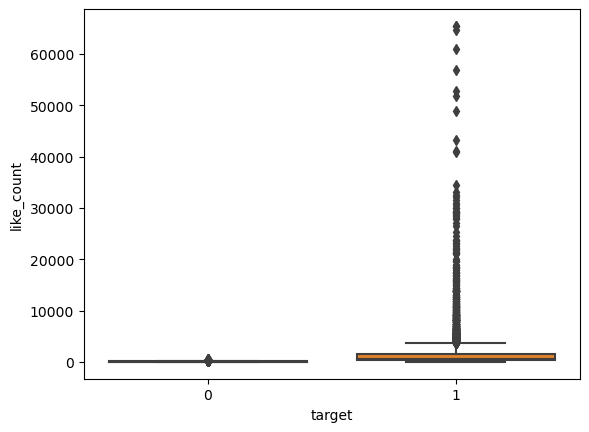

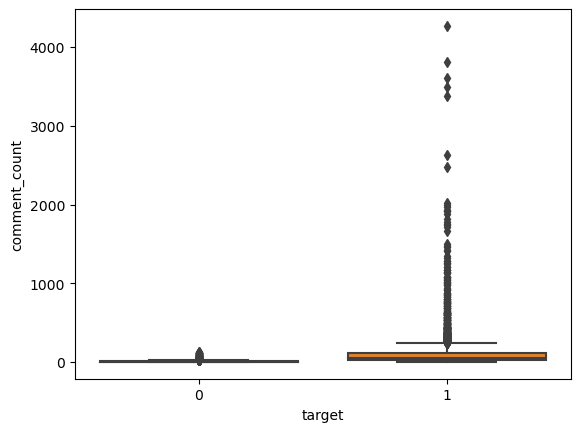

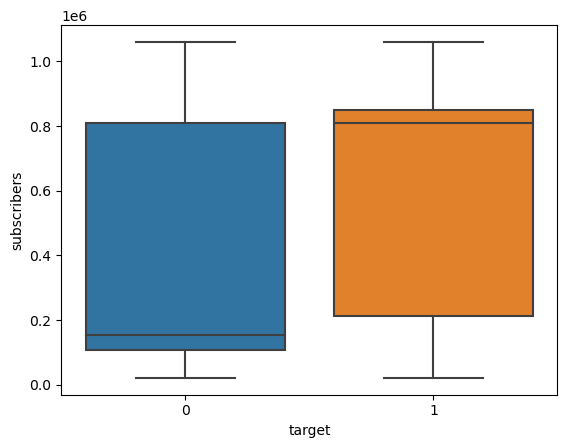

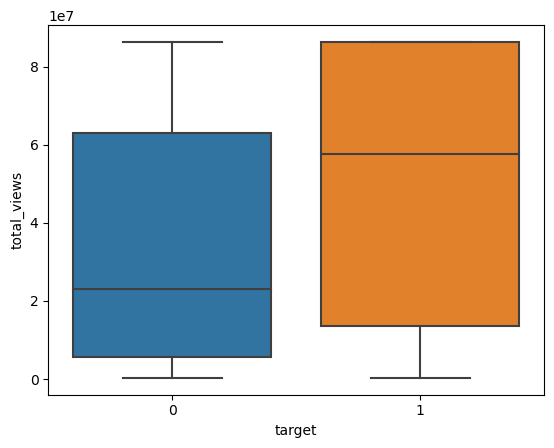

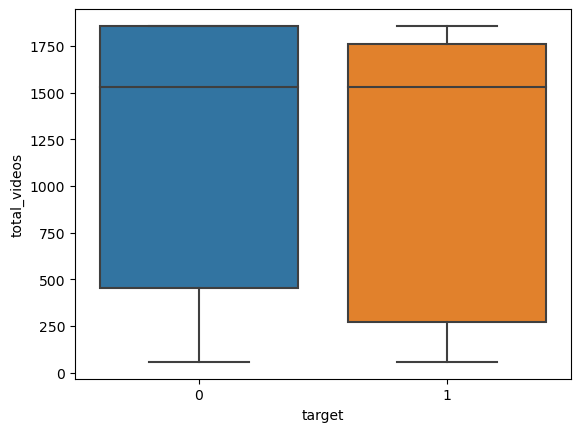

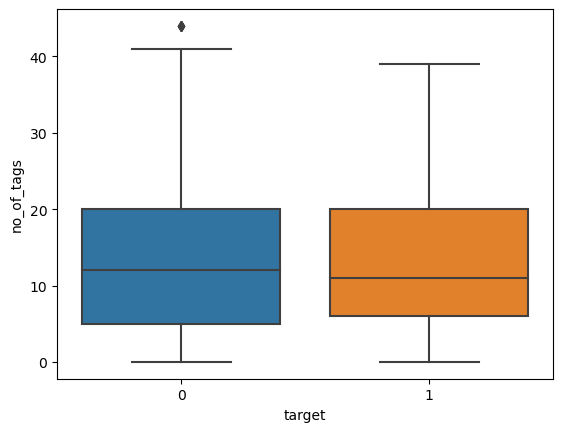

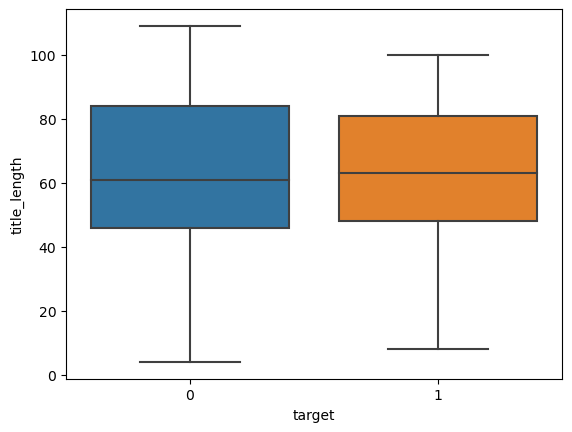

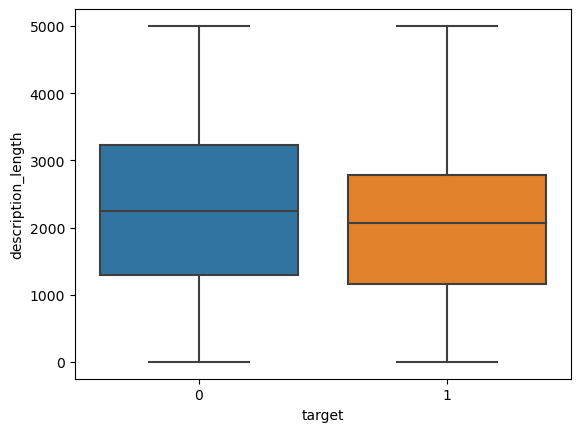

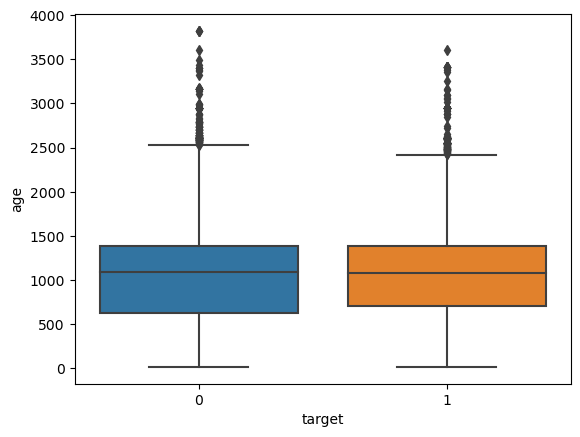

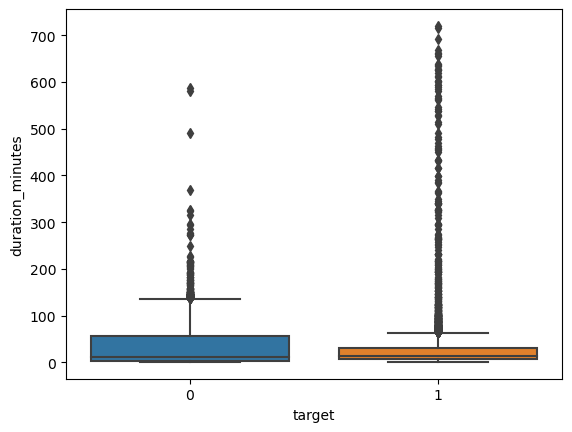

In [220]:
con_columns = ['like_count', 'comment_count', 'subscribers', 'total_views', 'total_videos', 'no_of_tags', 'title_length', 'description_length', 'age', 'duration_minutes']


for column in con_columns:

    sns.boxplot(data=df, x='target', y=column)

    plt.xlabel('target')
    plt.ylabel(column)

    plt.show()


##### Categorical

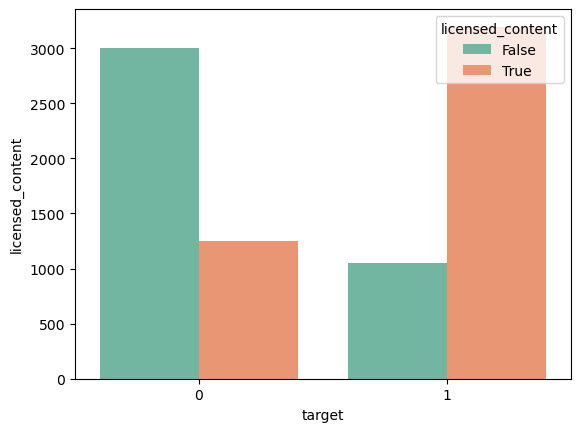

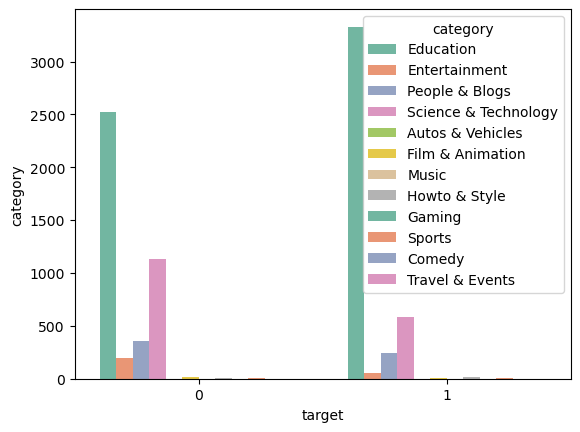

In [221]:
cat_columns = ['licensed_content', 'category']

# create box plots to visualise views vs tags
for column in cat_columns:
    
    sns.countplot(data=df, x='target', hue=column, palette='Set2')

    plt.xlabel('target')
    plt.ylabel(column)

    plt.legend(title=column, loc='upper right')


    plt.show()

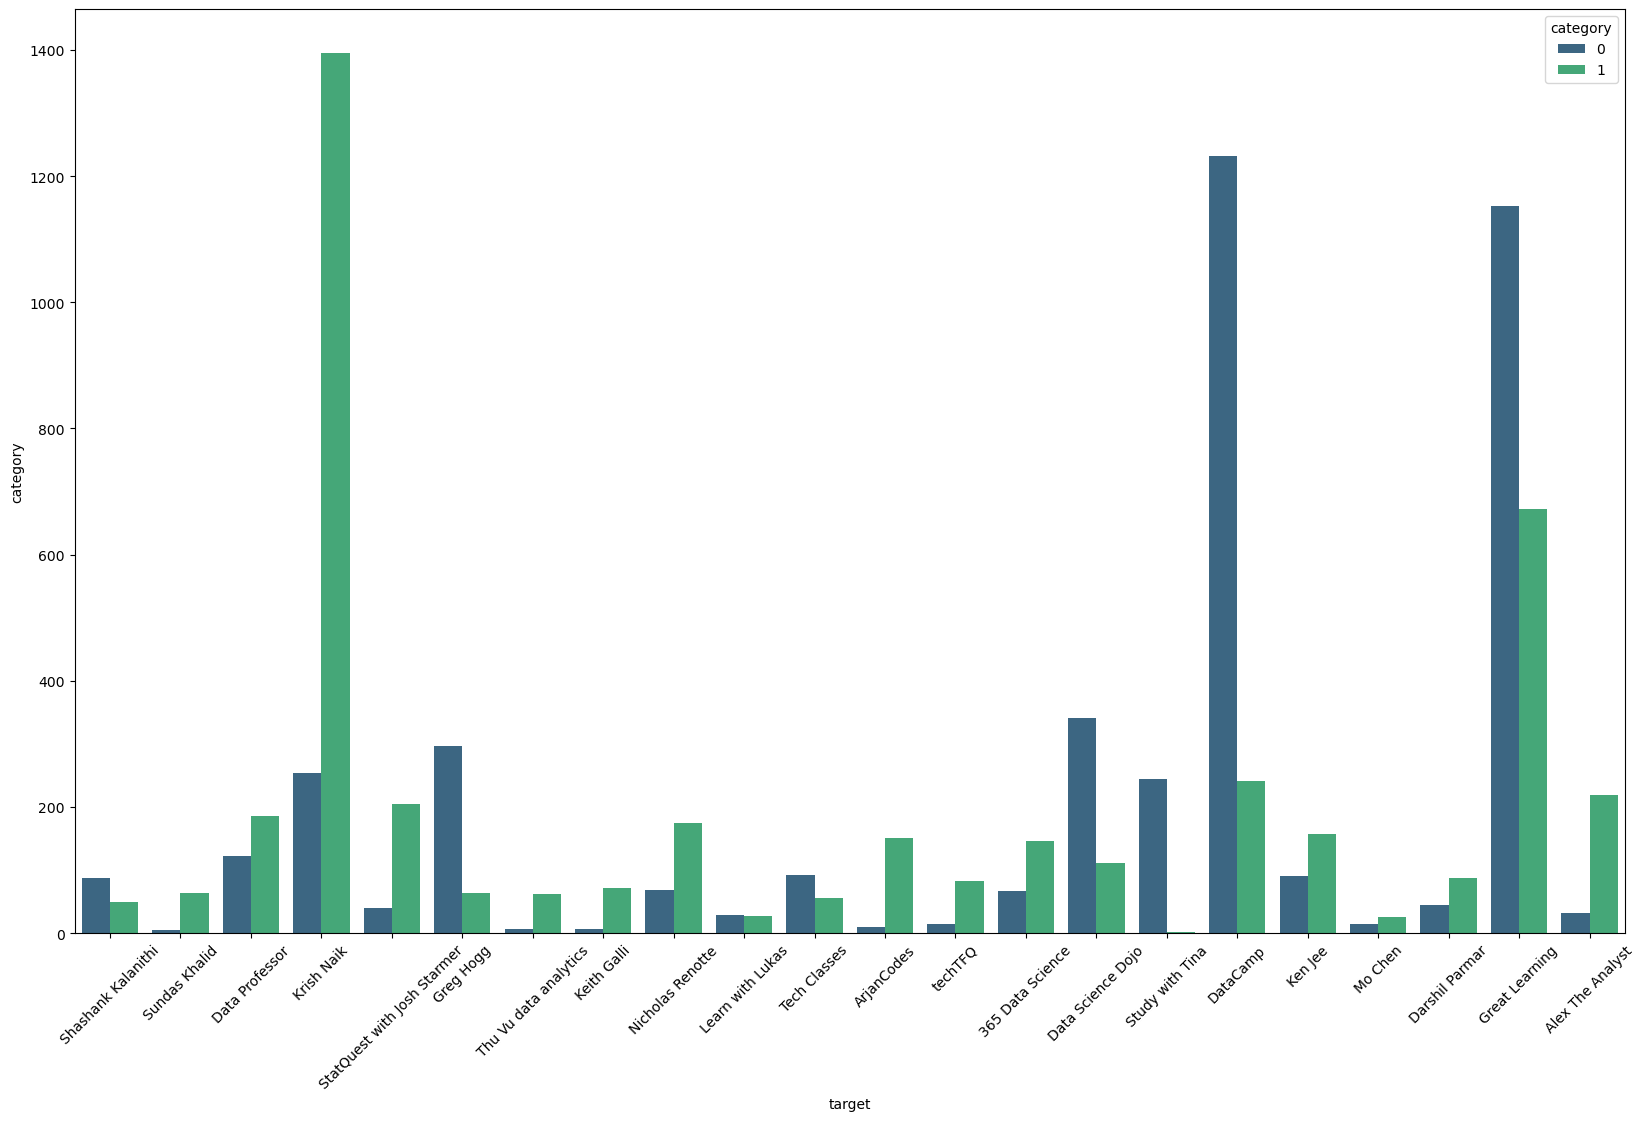

In [222]:
plt.figure(figsize=(20,12))
sns.countplot(data=df, x='channel_name', hue='target', palette='viridis')

plt.xlabel('target')
plt.ylabel(column)

plt.xticks(rotation=45)

plt.legend(title=column, loc='upper right')

plt.show()

In [223]:
result[:2]

target,0,1
channel_name,,
365 Data Science,31.455399,68.544601
Alex The Analyst,12.400000,87.600000


In [224]:
result.reset_index()[:2]

target,channel_name,0,1
0,365 Data Science,31.455399,68.544601
1,Alex The Analyst,12.400000,87.600000


In [225]:
result.reset_index().melt(id_vars='channel_name', var_name='target', value_name='percentage')

,channel_name,target,percentage
0,365 Data Science,0,31.455399
1,Alex The Analyst,0,12.400000
2,ArjanCodes,0,6.250000
3,Darshil Parmar,0,33.834586
4,Data Professor,0,39.610390
5,Data Science Dojo,0,75.442478
6,DataCamp,0,83.638832
7,Great Learning,0,63.157895
8,Greg Hogg,0,82.500000
9,Keith Galli,0,7.692308


In [226]:
import pandas as pd

# Create a DataFrame in wide format
wide_data = {'ID': [1, 2, 3],
             'Name': ['Alice', 'Bob', 'Charlie'],
             'Math': [90, 85, 92],
             'English': [88, 89, 91]}
wide_df = pd.DataFrame(wide_data)

# Display the original DataFrame
print("Original DataFrame (Wide Format):")
print(wide_df)

# Melt the DataFrame to long format
melted_df = wide_df.melt(id_vars=['ID', 'Name'], var_name='Subject', value_name='Score')

# Display the melted DataFrame
print("\nMelted DataFrame (Long Format):")
print(melted_df)


Original DataFrame (Wide Format):
   ID     Name  Math  English
0   1    Alice    90       88
1   2      Bob    85       89
2   3  Charlie    92       91

Melted DataFrame (Long Format):
   ID     Name  Subject  Score
0   1    Alice     Math     90
1   2      Bob     Math     85
2   3  Charlie     Math     92
3   1    Alice  English     88
4   2      Bob  English     89
5   3  Charlie  English     91


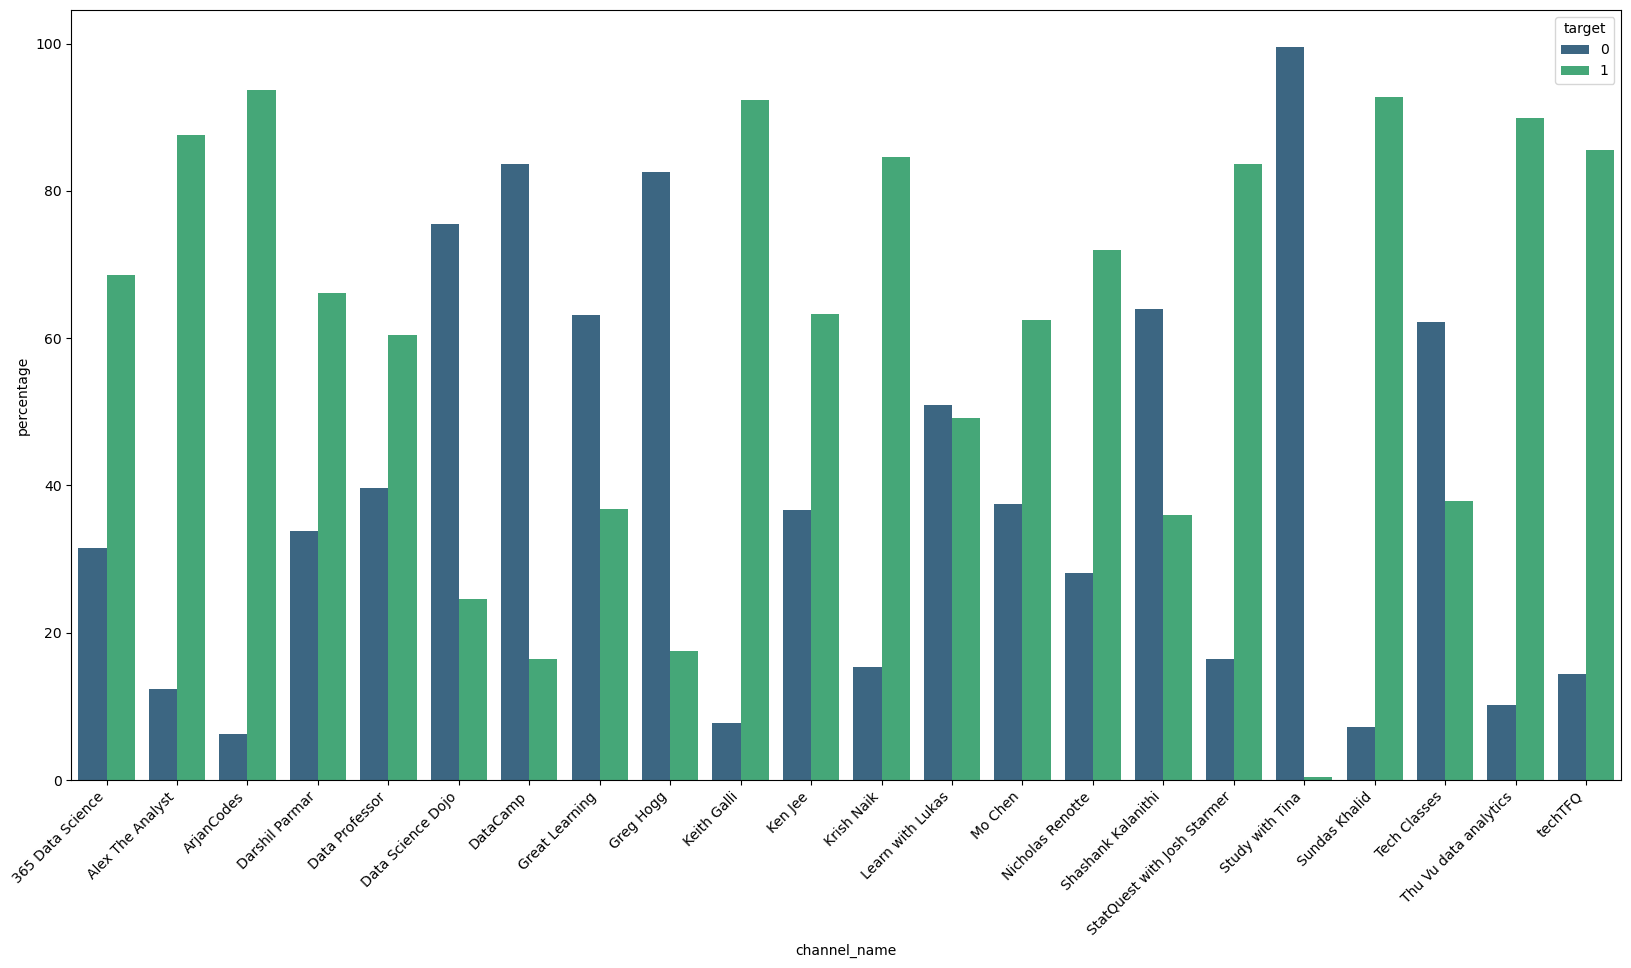

In [228]:
# Group by 'channel_name' and calculate the percentage of 1s and 0s in 'target'
result = df.groupby('channel_name')['target'].value_counts(normalize=True).unstack() * 100

# Melt the DataFrame to prepare for plotting
result_melted = result.reset_index().melt(id_vars='channel_name', var_name='target', value_name='percentage')

plt.figure(figsize=(20,10))

# Create a bar plot using Seaborn
sns.barplot(data=result_melted, x='channel_name', y='percentage', hue='target', palette='viridis')

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

##### Tag

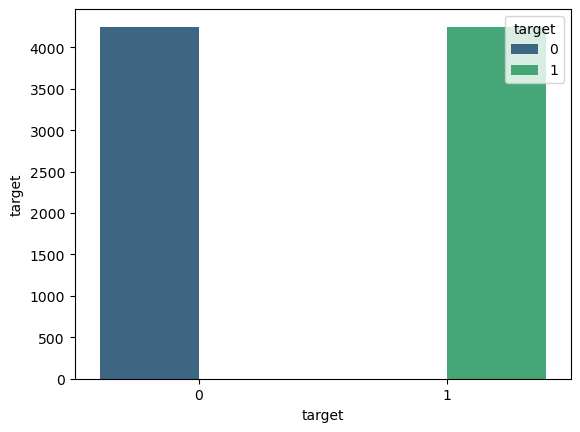

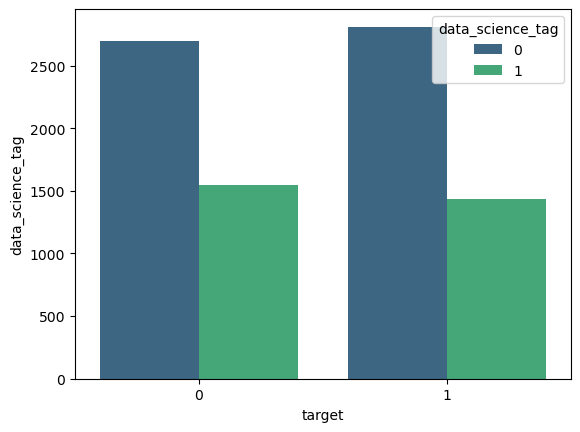

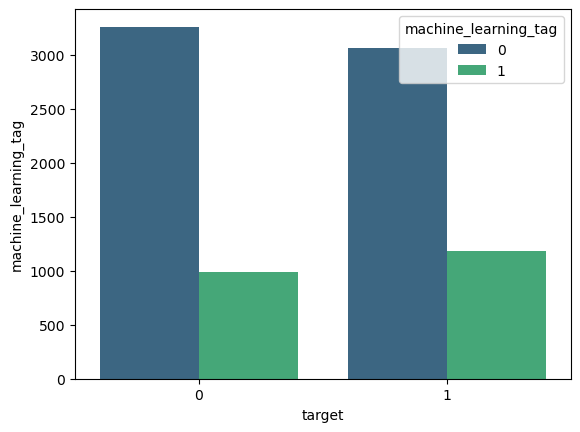

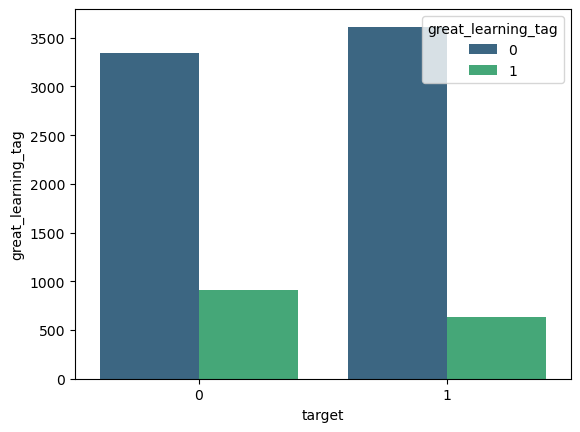

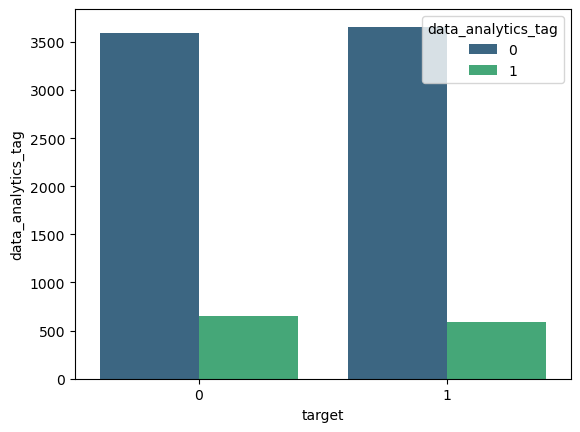

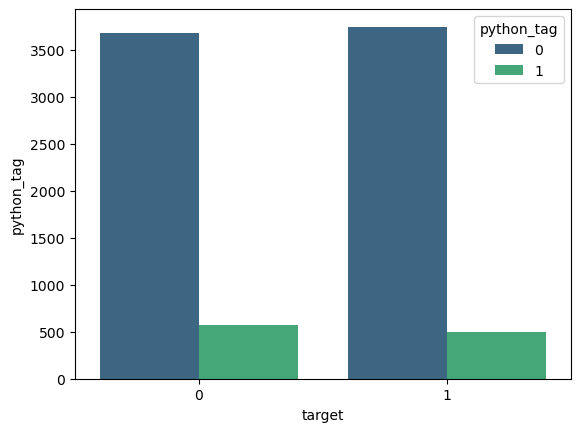

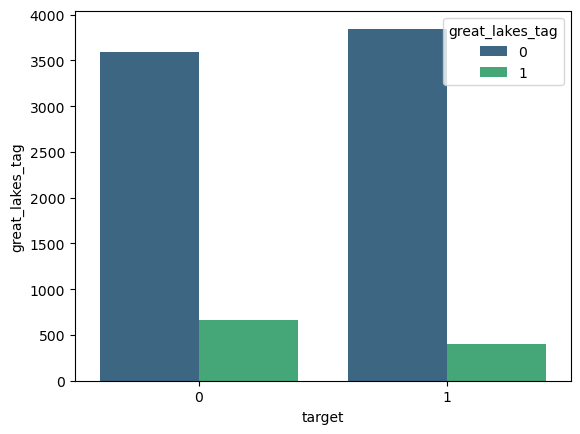

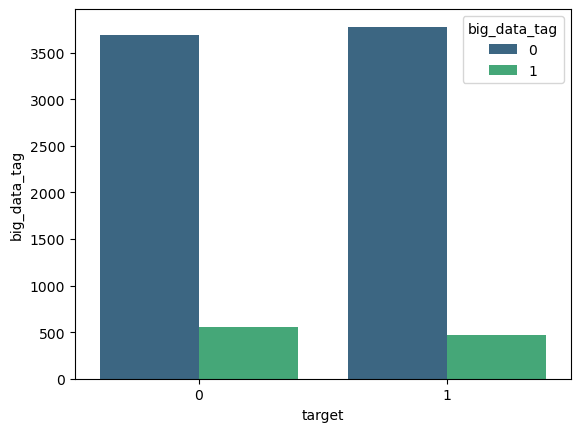

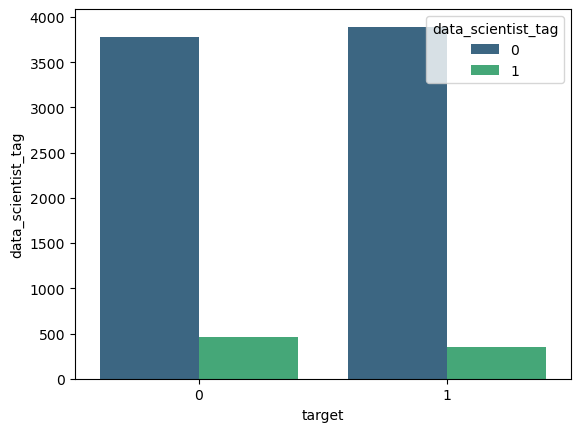

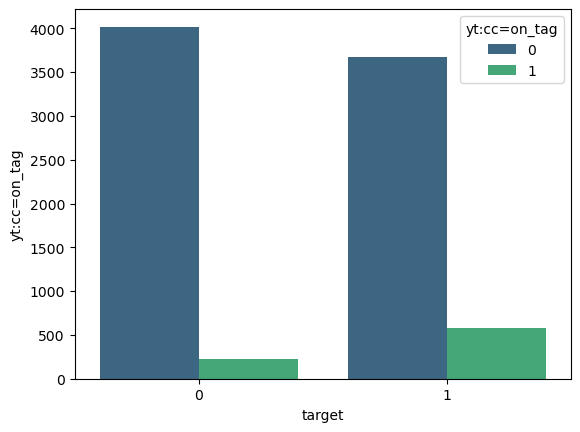

In [92]:
# create box plots to visualise views vs tags
for column in tag_df.columns[3:-1]:
    
    sns.countplot(data=tag_df, x='target', hue=column, palette='viridis')

    plt.xlabel('target')
    plt.ylabel(column)

    plt.legend(title=column, loc='upper right')


    plt.show()

## Multivariate Analysis

#### 

#### Heatmap Correlations

C:\Users\mms\AppData\Local\Temp\ipykernel_8976\1869358278.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap=cmap,annot=True,mask=np.triu(df.corr()))


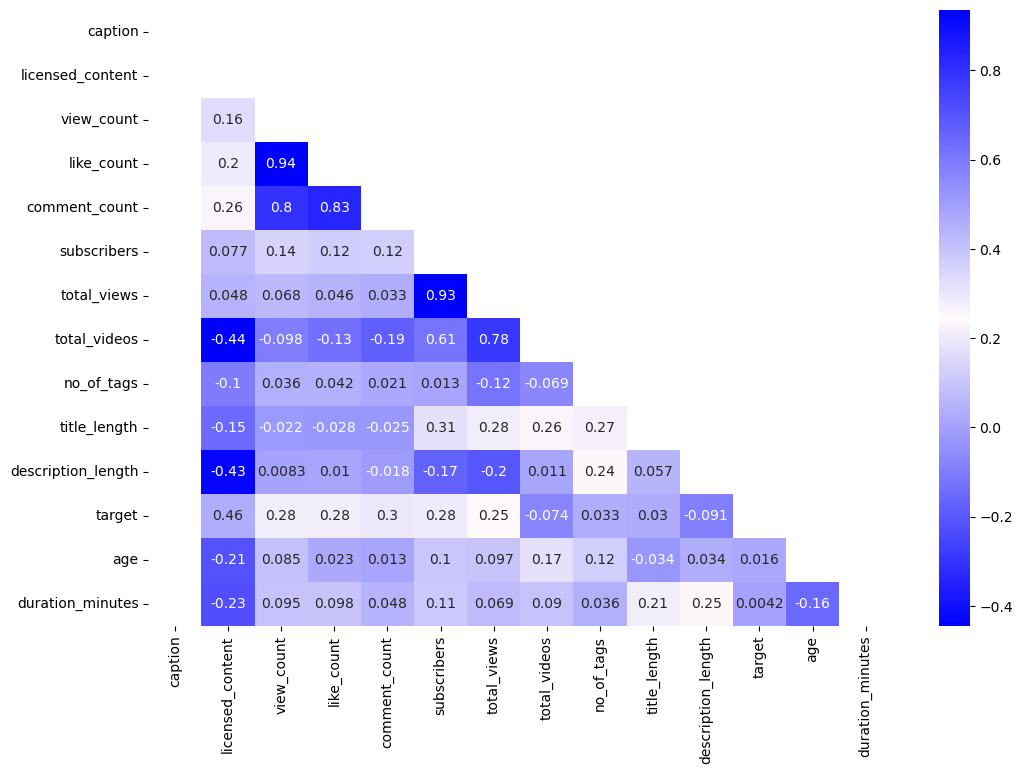

In [93]:
# create heatmap to visualise correlations
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize = (12, 8))
cmap = LinearSegmentedColormap.from_list('', ['blue', 'snow', 'blue'])
sns.heatmap(df.corr(),cmap=cmap,annot=True,mask=np.triu(df.corr()))

plt.show()

C:\Users\mms\AppData\Local\Temp\ipykernel_8976\3592762560.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tag_df.corr(),cmap=cmap,annot=True,mask=np.triu(tag_df.corr()))


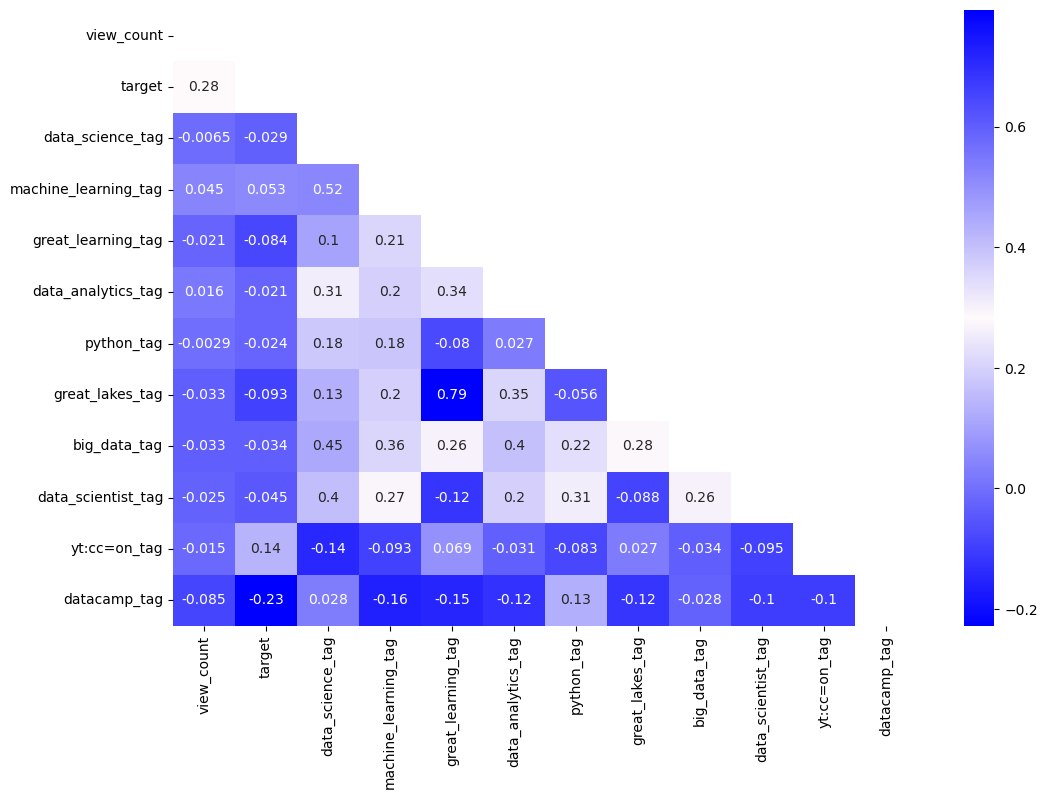

In [95]:
# create heatmap to visualise correlations
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize = (12, 8))
cmap = LinearSegmentedColormap.from_list('', ['blue', 'snow', 'blue'])
sns.heatmap(tag_df.corr(),cmap=cmap,annot=True,mask=np.triu(tag_df.corr()))

plt.show()

#### Channel vs Catergory

In [96]:
df.columns

Index(['video_id', 'channel_id', 'title', 'description', 'tags', 'caption',
       'licensed_content', 'view_count', 'like_count', 'comment_count',
       'channel_name', 'subscribers', 'total_views', 'total_videos',
       'playlist_id', 'category', 'duration_formatted',
       'published_at_formatted', 'no_of_tags', 'title_length',
       'description_length', 'target', 'age', 'duration_minutes'],
      dtype='object')

In [104]:
# cross table
cross_tab = pd.crosstab(df['category'], df['channel_name'])
cross_tab

channel_name,365 Data Science,Alex The Analyst,ArjanCodes,Darshil Parmar,Data Professor,Data Science Dojo,DataCamp,Great Learning,Greg Hogg,Keith Galli,Ken Jee,Krish Naik,Learn with Lukas,Mo Chen,Nicholas Renotte,Shashank Kalanithi,StatQuest with Josh Starmer,Study with Tina,Sundas Khalid,Tech Classes,Thu Vu data analytics,techTFQ
category,,,,,,,,,,,,,,,,,,,,,,
Autos & Vehicles,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Education,206,245,160,93,0,446,326,1823,299,75,16,1585,6,0,0,121,213,0,0,147,0,91
Entertainment,0,1,0,1,0,0,180,0,7,0,1,59,1,0,0,5,1,0,0,0,0,0
Film & Animation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0,0
Gaming,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Howto & Style,0,0,0,0,0,0,0,0,1,0,0,0,26,0,0,0,0,0,0,0,0,0
Music,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
People & Blogs,7,4,0,0,0,0,0,0,4,1,183,1,0,40,35,1,0,246,1,1,69,2


In [154]:
pivot_tab = df.pivot_table(
    'view_count', 
    index = 'category', 
    columns='channel_name'
)
round(pivot_tab.fillna(0),2)

channel_name,365 Data Science,Alex The Analyst,ArjanCodes,Darshil Parmar,Data Professor,Data Science Dojo,DataCamp,Great Learning,Greg Hogg,Keith Galli,Ken Jee,Krish Naik,Learn with Lukas,Mo Chen,Nicholas Renotte,Shashank Kalanithi,StatQuest with Josh Starmer,Study with Tina,Sundas Khalid,Tech Classes,Thu Vu data analytics,techTFQ
category,,,,,,,,,,,,,,,,,,,,,,
Autos & Vehicles,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22511.50,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
Comedy,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9577.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
Education,61351.12,110925.23,78606.01,38051.71,0.00,12209.16,23006.41,28870.22,5798.92,173327.01,55932.50,52433.30,5352.50,0.0,0.00,45064.26,265459.26,0.00,0.00,12808.74,0.0,147008.68
Entertainment,0.00,4157.00,0.00,1669.00,0.00,0.00,641.44,0.00,350.57,0.00,4231.00,32155.34,2959.00,0.0,0.00,14167.80,2722.00,0.00,0.00,0.00,0.0,0.00
Film & Animation,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,18002.04,0.00,0.00,0.00,0.0,0.00
Gaming,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42656.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
Howto & Style,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2639.00,0.00,0.00,0.00,43166.04,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
Music,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,3525.00,0.00,0.00,0.00,0.0,0.00
People & Blogs,119257.43,28166.00,0.00,0.00,0.00,0.00,0.00,0.00,336.75,1180254.00,37221.84,5500.00,0.00,52909.7,15314.03,2695.00,0.00,1147.99,59446.00,1391.00,71233.1,6474.50


In [156]:
pivot_tab = df.pivot_table(
    'target', 
    index = 'category', 
    columns='channel_name'
)
round(pivot_tab.fillna(0),2)

channel_name,365 Data Science,Alex The Analyst,ArjanCodes,Darshil Parmar,Data Professor,Data Science Dojo,DataCamp,Great Learning,Greg Hogg,Keith Galli,Ken Jee,Krish Naik,Learn with Lukas,Mo Chen,Nicholas Renotte,Shashank Kalanithi,StatQuest with Josh Starmer,Study with Tina,Sundas Khalid,Tech Classes,Thu Vu data analytics,techTFQ
category,,,,,,,,,,,,,,,,,,,,,,
Autos & Vehicles,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
Comedy,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
Education,0.67,0.88,0.94,0.70,0.0,0.25,0.40,0.37,0.17,0.92,0.81,0.84,0.17,0.00,0.00,0.33,0.92,0.0,0.00,0.38,0.0,0.9
Entertainment,0.00,0.00,0.00,0.00,0.0,0.00,0.01,0.00,0.00,0.00,0.00,0.90,0.00,0.00,0.00,0.80,0.00,0.0,0.00,0.00,0.0,0.0
Film & Animation,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.0,0.00,0.00,0.0,0.0
Gaming,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
Howto & Style,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.65,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
Music,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0
People & Blogs,1.00,1.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.67,0.00,0.00,0.62,0.40,0.00,0.00,0.0,1.00,0.00,0.9,0.5


#### Channel Size

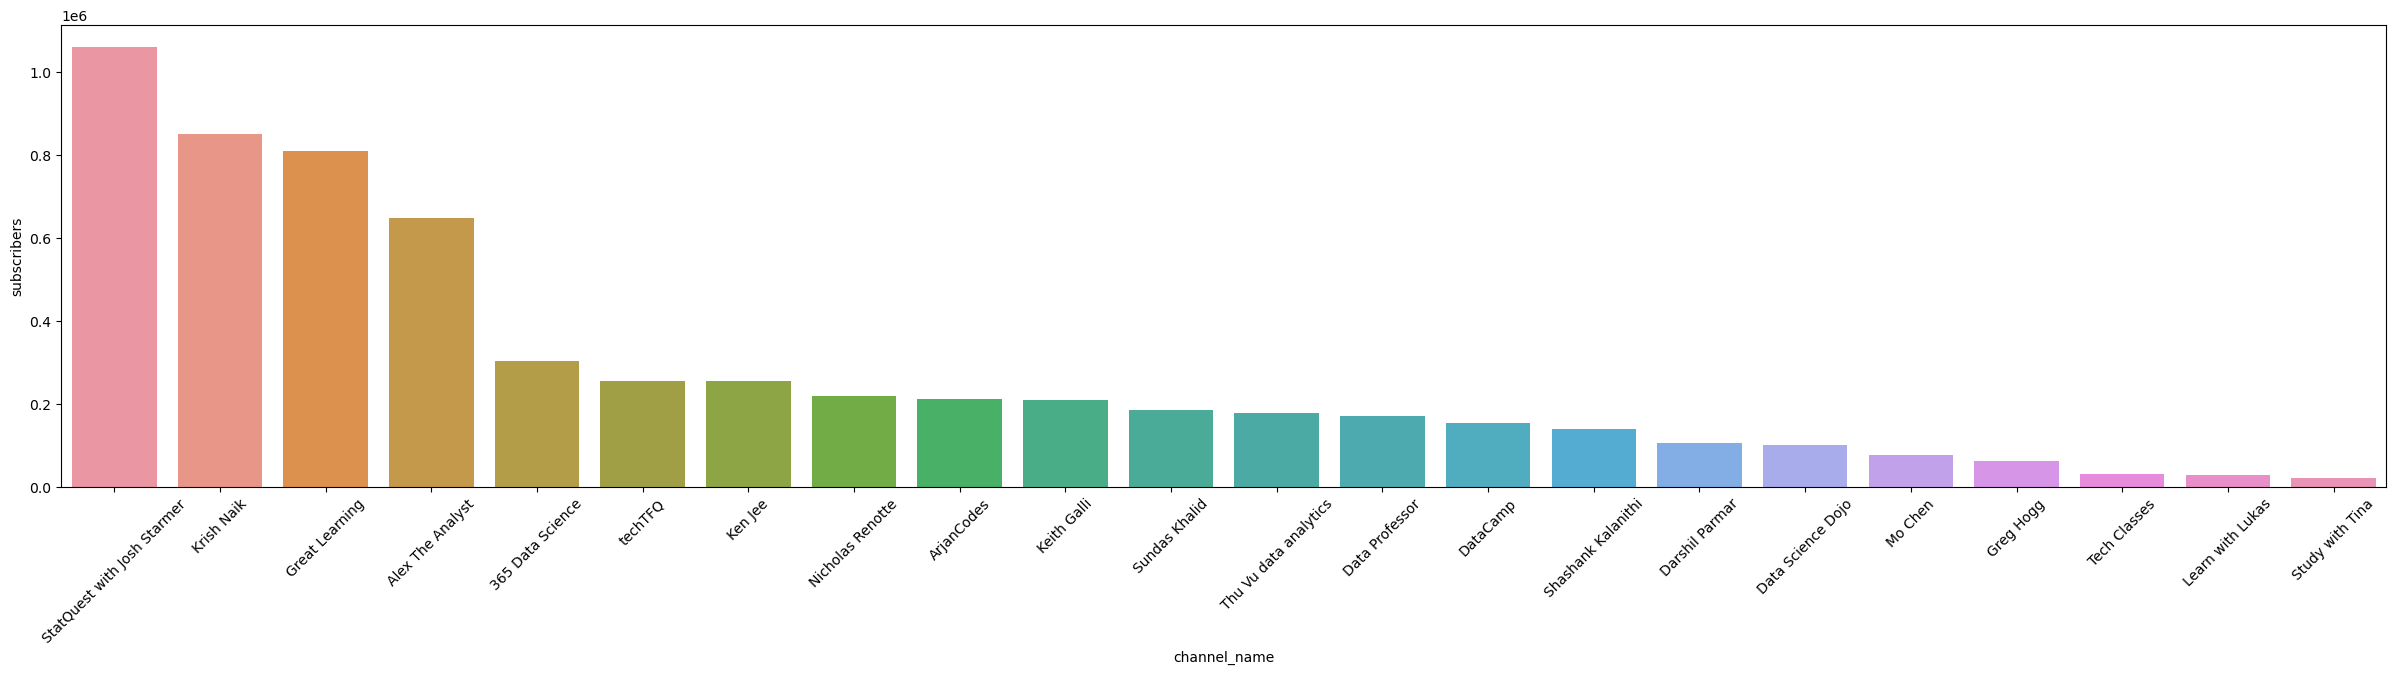

In [122]:
plt.figure(figsize=(30, 6))
# Calculate the order based on 'y_col' values
order = df.groupby('channel_name')['subscribers'].mean().sort_values(ascending=False).index 
sns.barplot(data=df, x='channel_name', y='subscribers', order=order)

plt.xticks(rotation=45)

plt.show()